V1.2 - 2023-07-22 - JLC <br>
V1.3 - 2024-04-21 - JLC correction typos + Simplifications.

# EEAI-Capteurs

# Transformée de Fourier discrète <a name="top"></a>

## [ 1 - Présentation du TP](#1)
## [ 2 - Calculs Python avec numpy et numpy.fft](#2)
### [2.1 Calcul d'un signal discrétisé simple : signal sinusoïdal ](#2.1)
### [2.2 Calcul d'un signal carré](#2.2)
## [ 3 - Théorème de Schanon et repliement spectral¶](#3)
<br><br>

## 1 $-$ Présentation du TP <a name="1"></a>

Compétences visées :
- Savoir utiliser le module `numpy` pour calculer numériquement un signal discrétisé et tracer son allure temporelle.
- Savoir utiliser la fonction `rfft` du module Python `numpy.fft` pour calculer le spectre d'amplitude d'un signal discrétisé et tracer son pectre d'amplitude.
- Savoir interpréter le spectre de raies d'un signal périodique discrétisé.
- Connaître le théorème de Schannon et ses conséqunces sur le repliement spectral d'un signal échantillonné.

## 2 $-$ Calculs Python avec `numpy` et `numpy.fft` <a name="2"></a>

In [1]:
import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt

La cellule ci-dessous permet à **matplotlib** de réaliser des courbes interactives dans le notebook.<br>
$\leadsto$ En cas d'erreur à l'exécution de la cellule vous pouvez remplacer **notebook** par **inline**.

In [2]:
%matplotlib inline

### 2.1 Calcul d'un signal discrétisé simple : signal sinusoïdal <a name="2.1"></a>

Soit le signal $x$ defini par $x: t \longmapsto \displaystyle{2.5 \sin\left(\frac{2\pi t}{T}\right)}$, de période $T$ et d'amplitude 2.5, défini à l'aide de la fonction `sin` du module *numpy* :

In [3]:
def x(t, T):
    return 2.5*np.sin(2*pi*t/T)

<span style="color:green"> $\leadsto$  Grâce à la *vectorisation* de la fonction `np.sin`, le paramètre `t` peut être un simple scalaire ou un tableau `np.ndarray` de valeurs temporelles.</span>

##### Paramètres du signal sinusoïdal
On définit :
- `Fs`, la fréquence du signal sinus, égale à 125 Hz.
- `Ts`, la période correspondante.

In [4]:
Fs = 125  # fréquence signal en Hertz
Ts = 1/Fs # période signal
print(f"Féquence Fs={Fs} Hz, période Ts={Ts*1000:.2f} ms")

Féquence Fs=125 Hz, période Ts=8.00 ms


[top](#top)

### a - Échantillonnage sur un nombre entier de périodes <a name="3.2-a"></a>

#### Définition des paramètres d'échantillonnage :
- <span style="color:blue">Définir `Fe`, la fréquence d'échantilonnage égale à 1000 Hz.</span>
- <span style="color:blue">Calculer `Te`, la période d'échantillonnage correspondante.</span>
- <span style="color:blue">Définir `D`, la durée d'échantilonnage ègale à $2\,T_s$.</span>
- <span style="color:blue">Faire afficher `Fe` en Hertz, `Te` en milli-seconde et `D` en seconde.</span>

In [5]:
Fe = 1000
Te = 1/Fe
D  = 2*Ts
print(f"Fe = {Fe} Hz, Te = {Te*1000:.2f} ms, D = {D:.3f} s.")

Fe = 1000 Hz, Te = 1.00 ms, D = 0.016 s.


<span style="color:green"> $\leadsto$ noter l'utilisation d'une **f-string** Python pour l'affichage efficace d'un  mélange de caractères et de variables en maîtrisant le formatage...</span> 

####  Définition du vecteur des instants d'échantillonnage 
- <span style="color:blue">Définir `t_ech`, le vecteur des instants d'échantillonnage allant de 0 à `D` **exclu**, par pas de `Te` (*indications* : utiliser [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)).</span>
- <span style="color:blue">Définir `N`, le nombre d'éléments de `t_ech`.</span>
- <span style="color:blue">Faire afficher le vecteur `t_ech` et `N`.</span>

In [6]:
t_ech = np.arange(0, D, Te)
N = len(t_ech)
print(f"tech : {t_ech}")
print(f"N: {N} temps discrets dans le vecteur t_ech")

tech : [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015]
N: 16 temps discrets dans le vecteur t_ech


<span style="color:green"> $\leadsto$ les temps d'échantillonnage doivent aller jusqu'à 15 ms, et le vecteur `t_ech` doit avoir 16 éléments.</span> 

[top](#top)

### b - Allure temporelle du signal échantillonné <a name="3.2-b"></a>

#### Calcul du signal échantillonné

- <span style="color:blue">Calculer `x_ech` le vecteur des valeurs du signal `x` pour chaque instant d'échantillonnage du vecteur `t_ech`.</span>

In [7]:
x_ech = x(t_ech, Ts)

#### Affichage de l'allure temporelle

La fonction `plot_sig_ech` du module `tools.utils` utilse la fonction [stem](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html) du module `matplolib` pour tracer le signal échantillonné sous la forme de barres verticales.

In [8]:
from tools.utils import plot_sig_ech
help(plot_sig_ech)

Help on function plot_sig_ech in module tools.utils:

plot_sig_ech(t_ech, s_ech, title='Signal discrétisé', xlabel='Temps [s]', ylabel='Signal [Unité arbitraire]')
    Trace les barres verticales montrant l'amplitude du signal aux temps échantillonnés.
    
    Arguments:
      t_ech: le vecteur [t_0, t_1... t_N-1] des N instants d'échantillonnage du signal
             ou la période d'échantilonnage.
      s_ech: le vecteur [s(t_0), s(t_1)...] des valeurs du signal s aux temps échantillonnés
      title: titre du tracé (défaut: 'Signal discrétisé').
      xlabel: le label de l'axe du temps (defaut: 'Temps [s]')
      ylabel: le label de l'axe Y (défaut: 'Signal [Unité arbitraire]')



- <span style="color:blue">Utiliser la fonction `plot_sig_ech` pour tracer le signal échantillonné</span>

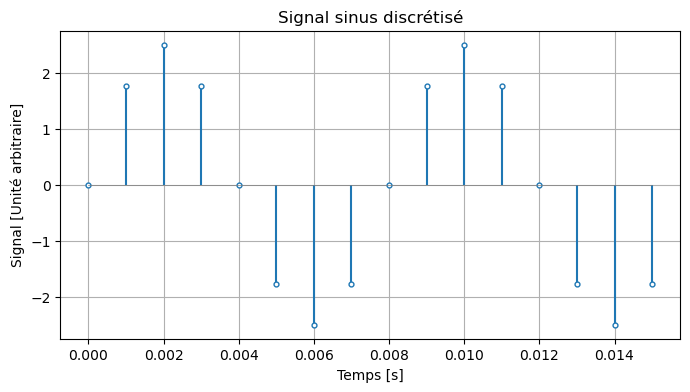

In [9]:
plot_sig_ech(t_ech, x_ech, "Signal sinus discrétisé")

[top](#top)

### c - Domaine fréquentiel : FFT (*Fast Fourier Transform*) et spectre du signal

- <span style="color:blue">Utiliser la fonction `rfft` du module `numpy.fft` pour calculer `X`, la FFT du signal `x` <br>
(si besoin, voir https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html)</span>
- <span style="color:blue">Calculer le **spectre d'amplitude** `A` égal au module des éléments de `X` multiplié par 2 et divisé par $N$ ($N$ : nbre d'échantillons temporels).<br>
(Indication : la fonction [np.absolute](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) permet de calculer le vecteur des modules des éléments d'un vecteur complexe (*element wise*))</span>
- <span style="color:blue">Faire afficher les valeurs de A.</span>

In [10]:
from numpy.fft import rfft
X = rfft(x_ech)
A = 2*np.absolute(X)/N
print(f"spectre de A: {A}")

spectre de A: [8.99930287e-17 4.35742612e-16 2.50000000e+00 3.17073629e-16
 9.45511743e-17 1.00674754e-16 6.66159877e-16 5.31510746e-16
 2.43073879e-16]


- <span style="color:blue">combien y-a-t-il d'éléments dans la FFT de `x` ? Pouvez-vous l'expliquer ?</span>
- <span style="color:blue">que représente A[0] ?</span>

[*Répondre ici...*]<br>

$\leadsto$ 9 éléments dans la FFT car `rfft` tient compte de la symétrie de la FFT d'un signal à valeurs réelles, et donc on n'a besoin que des valeurs de 0 à Fe/2 et non pas de 0 à Fe (9 valeurs au lieu de 16).<br>
$\leadsto$ A[0] est la valeur du spectre à la **fréquence nulle** : c'est la **valeur moyenne** du signal, également apellée **composante continue** (pour un signal sinus sur une période la valeur théorique est de zéro).

- <span style="color:blue">Calculer la résolution en fréquence `delta_f` ($\Delta F = F_e / N$) et vérifier que sa valeur est 62.5 Hz.</span>

In [11]:
delta_f = Fe/N
print(f"delta_f : {delta_f} Hz")

delta_f : 62.5 Hz


- <span style="color:blue">Calculer `f_ech`, le vecteur des fréquences discrètes de la FFT en utilisant [np.arange](nmpy.org/doc/stable/reference/generated/numpy.arange.html), `len(X)` et `delta_f`.</span>
- <span style="color:blue">Afficher `f_ech`, et vérifier que sa dernière valeur est bien `Fe/2`</span>

In [12]:
f_ech = np.arange(len(X))*delta_f
print("f-ech : ", f_ech)
print(f"dernière valeur de f_ech : {f_ech[-1]} Hz")

f-ech :  [  0.   62.5 125.  187.5 250.  312.5 375.  437.5 500. ]
dernière valeur de f_ech : 500.0 Hz


### d - Tracé du spectre d'amplitude

La fonction `plot_spectre_amplitude` du module `tools.utils` utilse la fonction [stem](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html) du module `matplolib` pour tracer le spectre d'amplitude du signal échantillonné sous la forme de barres verticales.

In [13]:
from tools.utils import plot_spectre_amplitude
help(plot_spectre_amplitude)

Help on function plot_spectre_amplitude in module tools.utils:

plot_spectre_amplitude(f_ech, spectre, f_max=None, title="Spectre d'amplitude", nb_line_printed=0, plot_harmonics=False)
    Trace les raies du spectre d'amplitude d'un signal discrétisé.
    
    Arguments:
                 f_ech: le pas en fréquence (Delta_F) ou le vecteur des fréquences discrètes
               spectre: le vecteur des amplitude du spectre pour les fréquences discrètes.
                 title: titre du tracé (défaut: "Spectre d'amplitude").
      nb_line_printed: nombre de raies listés sous le graphe (fréquence et amplitude), défaut=0
        plot_harmonics: Pour faire tracer les raies harmoniques, if faut donner un couple 
                        (nbre max d'hamoniques, width) dont la signification est donnée 
                        avec la fonction find_harmonics. Valeur par défault: False.



- <span style="color:blue">Tracer le spectre d'amplitude du signal echnatillonné.</span>

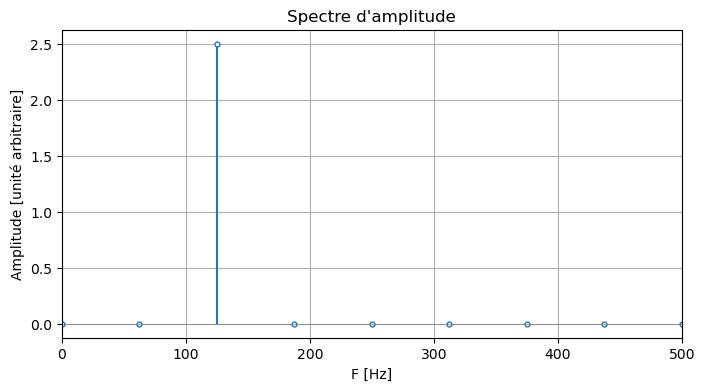

In [14]:
plot_spectre_amplitude(f_ech, A)

- <span style="color:blue">En utilisant la méthode `argmax` du vecteur `A`, faire afficher la fréquence et la valeur du plus grand pic du spectre</span>

In [15]:
i = A.argmax()
F_max = f_ech[i]
A_max = A[i]
print(f"Le plus grand pic du signal x à {F_max} Hz vaut {A_max:.2f}")

Le plus grand pic du signal x à 125.0 Hz vaut 2.50


- <span style="color:blue">Comparer le spectre du signal échantillonné au spectre théorique ...</span>

[*Répondre ici...*]<br>
Le spectre théorique prévoit un dirac à la fréquence du sinus de poids égal à l'amplitude du signal : la version discrétisée est une raie à la fréquence du sinus d'amplitude 2.5.  

[top](#top)

### e - Échantillonnage sur une durée quelconque

- <span style="color:blue">Refaire les calculs, affichages et tracés précédents en modifiant la durée d'échantillonnage pour avoir un nombre __non entier__ de périodes du signal, par exemple : $D = 3.3\,T_s$.</span>

Vous pouvez utiliser la fonction `process_periodic_signal` du module `tools.utils` pour refaire l'ensemble des calculs et affichages précédents, en passant les paramètres indiqués par l'aide ci-dessous:

In [16]:
from tools.utils import process_periodic_signal
help(process_periodic_signal)

Help on function process_periodic_signal in module tools.utils:

process_periodic_signal(x, Fs, Fe, D, temporal_plot=True, nb_line_printed=0, temporal_title='Tracé temporel', spectral_title="Spectre d'amplitude")
    - Calcule le vecteur des temps discrets,
    - Trace l'allure temporelle du signal discrétisé
    - Calcule la FFT et le spectre d'amplitude du signal,
    - Trace le spectre d'amplitude.
    
    Arguments :
      x : fonction vectorisée définissant le signal périodique, qui doit prendre 
          2 arguments : le vecteur des instants d'échantillonage, et la période du signal.
      Fs: fréquence du signal x en Hertz.
      Fe: fréquence d'échantilonnage en Hertz.
      D : durée de l'échantillonnage en secondes. 
      nb_line_printed: nombre de raies listées sous le graphe (fréquence et amplitude), défaut=0
      temporal_title: titre du tracé temporel
      spectral_title: titre du tracé du spectre
    
    Retour:
      renvoie t_ech, x_ech, f_ech, A
        t_ech: v

_indication_ : si vous n'utilisez pas les données renvoyées par la fonction `process_periodic_signal`, vous pouvez mettre un caractère `;` à la fin de la ligne d'appel à la fonction pour éviter l'affichage des données renvoyées.

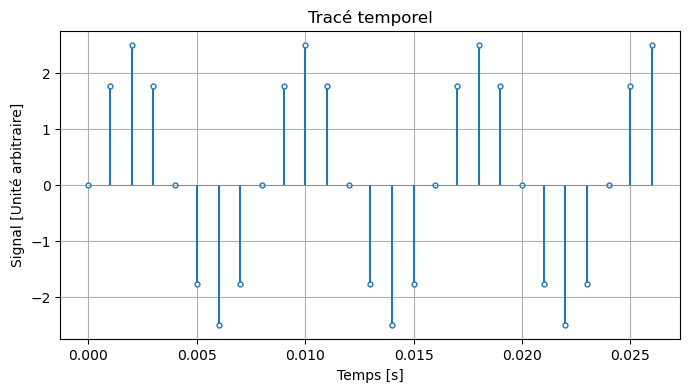

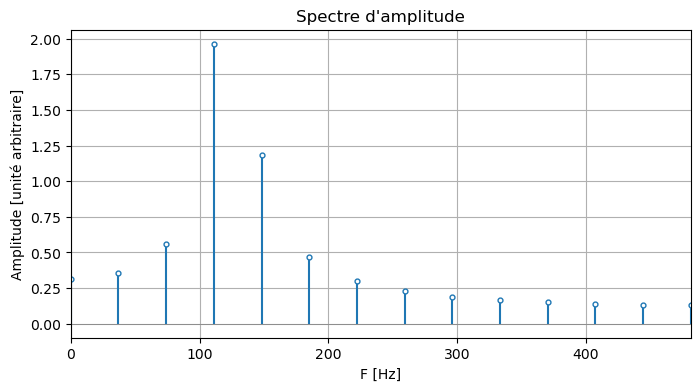

le pas en fréquence est :     37.0 Hz
Valeur du pic du spectre d'amplitude à 111.111 Hz : 1.965


In [17]:
D = 3.3*Ts
process_periodic_signal(x, Fs, Fe, D);   # point virgule pour éviter l'affichage 
                                         # des données renvoyées par la fonction

- <span style="color:blue">Que constatez-vous ?</span>

[*Répondre ici...*]<br>
$\leadsto$ Au lieu d'une seule raie comme précédement, le spectre est étalé sur plusieurs raies (_élargissement_ du spectre d'amplitude). 

- <span style="color:blue">En utilisant les relations $\Delta F = F_e/N$, et $D = N T_e = N/F_e$ choisir une durée $D$ pour avoir un pas en fréquence $\Delta f$ de 5 Hz : tracer le spectre d'amplitude avec la focntion `process_periodic_signal` en désactivant le tracé de l'allure temporelle.</span>

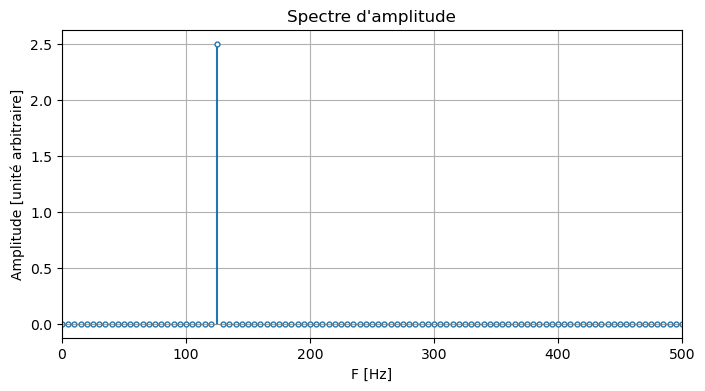

le pas en fréquence est :      5.0 Hz
Valeur du pic du spectre d'amplitude à 125.000 Hz : 2.500


In [18]:
D = 1/5
process_periodic_signal(x, Fs, Fe, D, temporal_plot=False);

- <span style="color:blue">Refaire le même travail en choisissant une durée d'échantillonage $D = 11.6\,T_s$ 
    (désactiver le tracé de l'allure temporelle).<br>
 Nommer `t_ech, x_ech, f_ech, A` les données renvoyées par la fonction.</span>

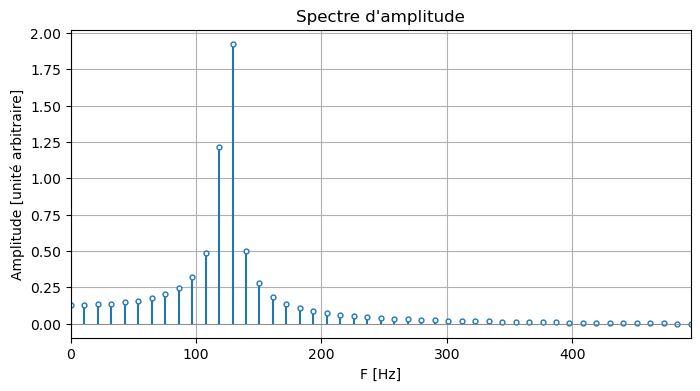

le pas en fréquence est :     10.8 Hz
Valeur du pic du spectre d'amplitude à 129.032 Hz : 1.926


In [19]:
D = 11.6*Ts
t_ech, x_ech, f_ech, A = process_periodic_signal(x, Fs, Fe, D, temporal_plot=False)

- <span style="color:blue">Vérifier que l'on peut retrouver l'amplitude du signal en calculant $\displaystyle{\sqrt{\sum_i{A_i^2}}}$.

In [20]:
np.sqrt(sum(A**2))

2.4882160788999994

[top](#top)

### 2.2 Calcul d'un signal discrétisé simple : signal carré <a name="2.2"> </a>

On s'intéresse maintenant à un signal carré que l'on définiera à partir de la fonction `square` du module `scipy.signal`.<br>
Si le module `scipy` n'est pas installé dans votre environnement Python **minfo** vous pouvez l'installer avec la cellule ci-dessous :

In [21]:
!pip install scipy

On garde la même fréquence d'échantillonnage que précédement :

In [22]:
print(f"Fréquence éch. Fe = {Fe} Hz, période Te = {Te*1000} ms")

Fréquence éch. Fe = 1000 Hz, période Te = 1.0 ms


#### Définition du signal carré
La fonction [square](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.square.html)
du module `scipy.signal` définit un signal carré périodique de période égale $2\pi$.<br>
Pour en faire un signal carré de fréquence $F_c$ (période $T_c = 1/F_c$), il faut multiplier le temps par $2\pi/ T_c$.

- <span style="color:blue">Définir la fonction `carre` d'arguments `t` (vecteur de temps discrets) et `T` (période du signal) qui renvoie `square(2*pi*t/T)`.</span>
- <span style="color:blue">Définir `Fc`, la fréquence du signal carré, égale à 14 Hz et `Tc`, la période correspondante.</span>
- <span style="color:blue">Faire afficher `Fc`en Hertz et `Tc` en milli-seconde.</span>

In [23]:
from scipy.signal import square

def carre(t, T):
    return square(2*pi*t/T)

Fc = 14
Tc = 1/Fc
print(f"Féquence Fc = {Fc} Hz, période Tc = {Tc*1000:.2f} ms")

Féquence Fc = 14 Hz, période Tc = 71.43 ms


- <span style="color:blue">Faire tracer l'allure temporelle et le spectre d'amplitude avec la fonction `process_periodic_signal` en réglant la durée d'échantillonnage pour avoir une résolution fréquentielle de 1 Hz et en demandant de lister les 10 premiers pics du spectre.</span>

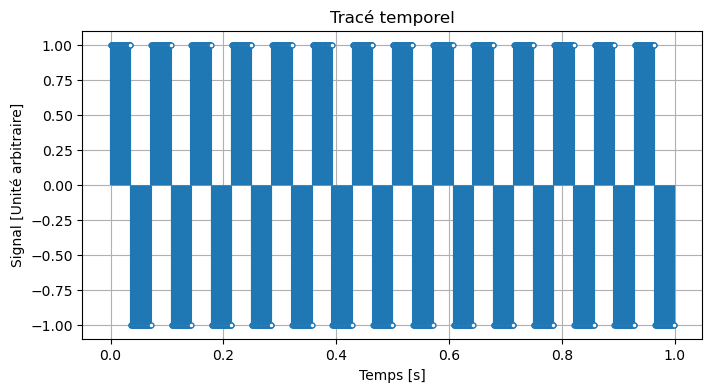

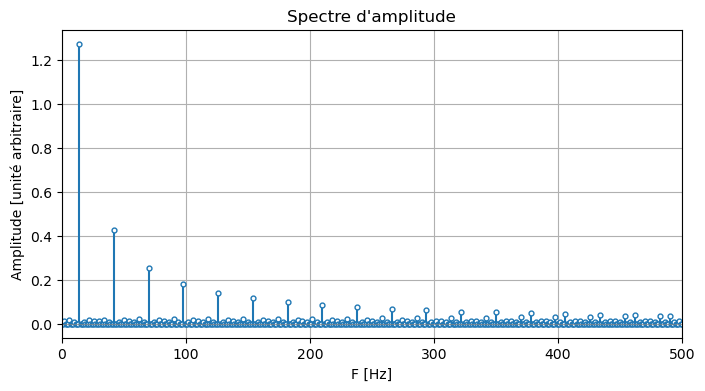

Pics du spectre :
	      14.0 Hz	  1.2732
	      42.0 Hz	  0.4244
	      70.0 Hz	  0.2547
	      98.0 Hz	  0.1820
	     126.0 Hz	  0.1415
	     154.0 Hz	  0.1158
	     182.0 Hz	  0.0981
	     210.0 Hz	  0.0850
	     238.0 Hz	  0.0750
	     266.0 Hz	  0.0672
le pas en fréquence est :      1.0 Hz
Valeur du pic du spectre d'amplitude à 14.000 Hz : 1.273


In [24]:
D = 1/1
process_periodic_signal(carre, Fc, Fe, D, nb_line_printed=10);

- <span style="color:blue">Calculer et afficher les ampltitudes théoriques des 10 premières raies du spectre d'amplitude<br>
    (utiliser une __f_string__ Python pour maîtriser le formatage des nombres affichés).</span>

In [25]:
for i in range(10):
    rang = 2*i+1
    print(f"rang {rang:2d}, fréquence {rang*Fc:4d} Hz, amplitude: {4/(rang*pi):.4f}")

rang  1, fréquence   14 Hz, amplitude: 1.2732
rang  3, fréquence   42 Hz, amplitude: 0.4244
rang  5, fréquence   70 Hz, amplitude: 0.2546
rang  7, fréquence   98 Hz, amplitude: 0.1819
rang  9, fréquence  126 Hz, amplitude: 0.1415
rang 11, fréquence  154 Hz, amplitude: 0.1157
rang 13, fréquence  182 Hz, amplitude: 0.0979
rang 15, fréquence  210 Hz, amplitude: 0.0849
rang 17, fréquence  238 Hz, amplitude: 0.0749
rang 19, fréquence  266 Hz, amplitude: 0.0670


- <span style="color:blue">Que constatez-vous ?</span>

[*Répondre ici...*]<br>
$\leadsto$ L'amplitude et la fréquence des raies du spectre correpond aux valeurs thériques.

[top](#top)

## 3 $-$ Théorème de Schannon et repliement spectral <a name="3"></a>

- <span style="color:blue">Que dit le théorème de schannon ?

[*Répondre ici...*]<br>
$\leadsto$ On peut retrouver toute l'information d'un signal continu à partir du signal échantillonné si et seulement si la fréquence max du signal est plus petite que le demi-fréquence d'échantillonnage.

- <span style="color:blue">Pour illustrer le phénomène de **repliement spectral**, faire tracer avec la fonction `process_periodic_signal` le spectre d'amplitude du signal $ x: t \longmapsto 2.5\sin(2\pi F_s t)$ (définit au paragraphe 2.1) échantillonné à $F_e = 1000$ Hz sur une durée $D = 1/10$ s, pour des valeurs de $F_s$ égales à 400, 600 700 et 800 Hz.

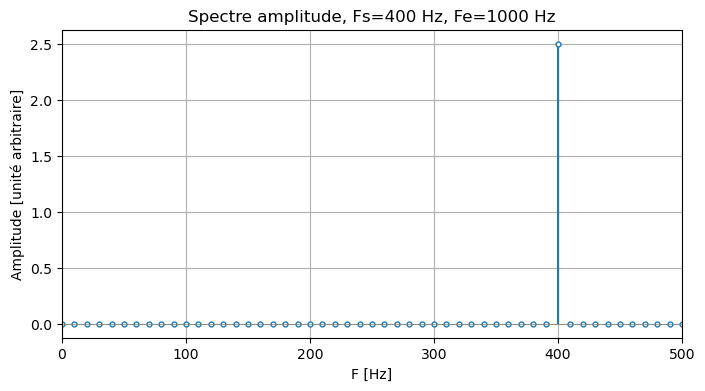

le pas en fréquence est :     10.0 Hz
Valeur du pic du spectre d'amplitude à 400.000 Hz : 2.500


In [26]:
Fe = 1000
Fs = 400
D = 1/10
process_periodic_signal(x, Fs, Fe, D, temporal_plot=False, 
                        spectral_title=f"Spectre amplitude, Fs={Fs} Hz, Fe={Fe} Hz");

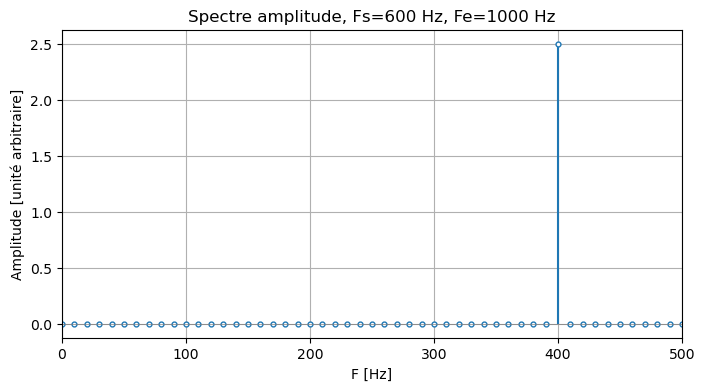

le pas en fréquence est :     10.0 Hz
Valeur du pic du spectre d'amplitude à 400.000 Hz : 2.500


In [27]:
Fe = 1000
Fs = 600
D = 1/10
process_periodic_signal(x, Fs, Fe, D, temporal_plot=False, 
                        spectral_title=f"Spectre amplitude, Fs={Fs} Hz, Fe={Fe} Hz");

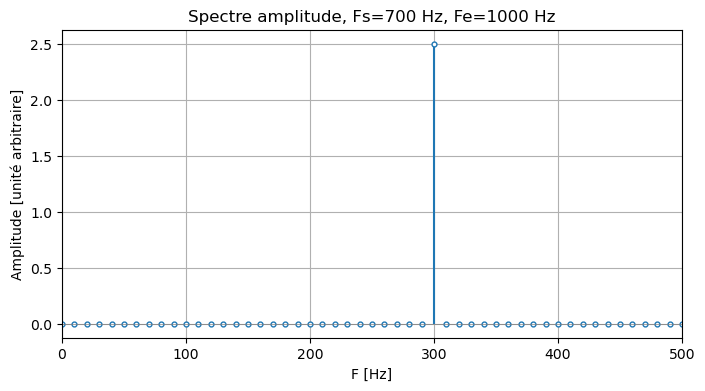

le pas en fréquence est :     10.0 Hz
Valeur du pic du spectre d'amplitude à 300.000 Hz : 2.500


In [28]:
Fe = 1000
Fs = 700
D = 1/10
process_periodic_signal(x, Fs, Fe, D, temporal_plot=False, 
                        spectral_title=f"Spectre amplitude, Fs={Fs} Hz, Fe={Fe} Hz");

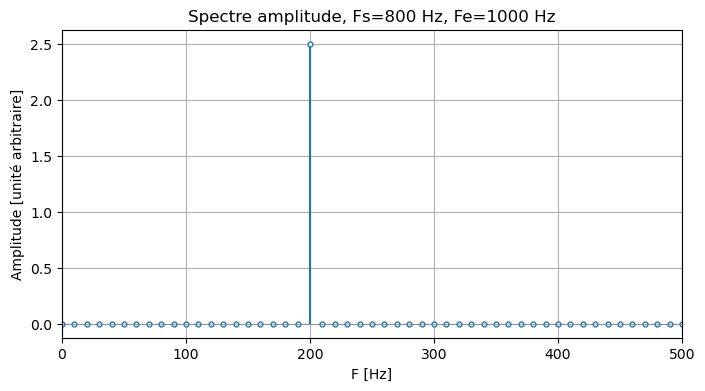

le pas en fréquence est :     10.0 Hz
Valeur du pic du spectre d'amplitude à 200.000 Hz : 2.500


In [29]:
Fe = 1000
Fs = 800
D = 1/10
process_periodic_signal(x, Fs, Fe, D, temporal_plot=False, 
                        spectral_title=f"Spectre amplitude, Fs={Fs} Hz, Fe={Fe} Hz");

- <span style="color:blue">Qu'observe-t-on ?

[*Répondre ici...*]<br>
$\leadsto$ Dès que la fréquence du sinus est supérieure à Fe/2 = 500 Hz, on observe le repliement de la raie spectrale par rapport à 500 Hz :
- un sinus à 600 Hz échantillonné à 1000 Hz se replie comme une raie à 400 Hz,
- un sinus à 700 Hz échantillonné à 1000 Hz se replie comme une raie à 300 Hz,
- un sinus à 800 Hz échantillonné à 1000 Hz se replie comme une raie à 200 Hz,

[top](#top)

###### 